<a href="https://colab.research.google.com/github/fjpAntunes/mean-field-tools/blob/develop/experiments/deep_bsde_quadratic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
!git clone -b develop https://github.com/fjpAntunes/mean-field-tools.git

Cloning into 'mean-field-tools'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 223 (delta 120), reused 170 (delta 78), pack-reused 0
Receiving objects: 100% (223/223), 1.91 MiB | 6.47 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [2]:
%cd mean-field-tools/

/content/mean-field-tools


In [3]:
from mean_field_tools.deep_bsde.forward_backward_sde import Filtration, BackwardSDE
import torch

In [4]:
%pdb

Automatic pdb calling has been turned ON


Epoch 1


100%|██████████| 200/200 [00:25<00:00,  7.96it/s]


Epoch 2


100%|██████████| 200/200 [00:26<00:00,  7.64it/s]


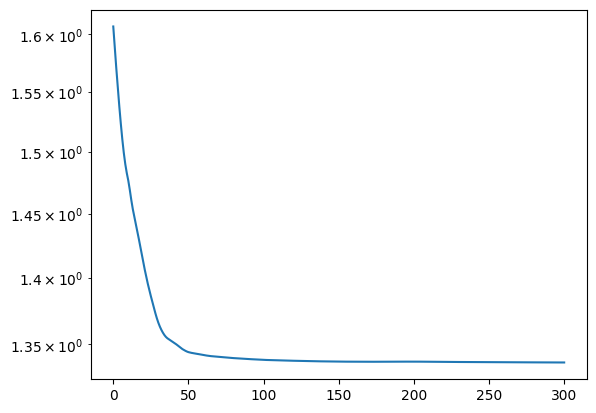

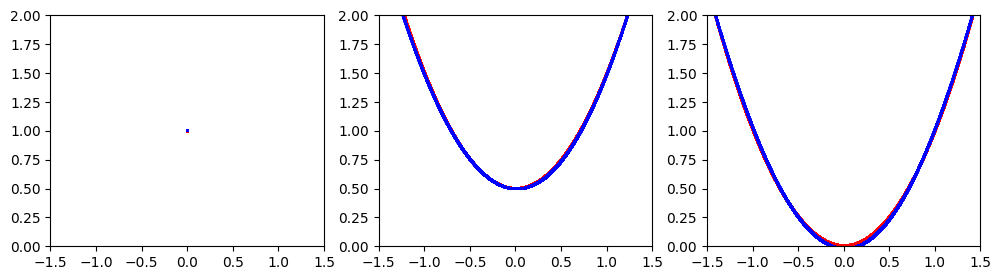

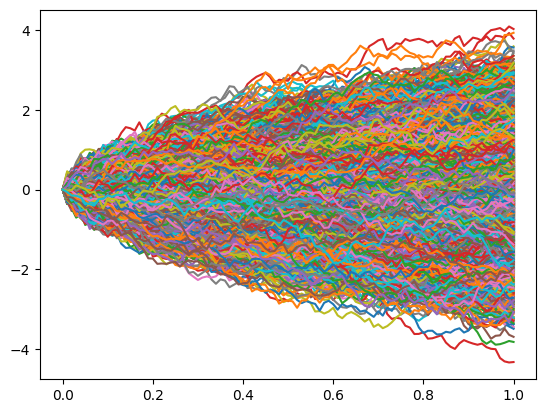

Epoch 3


100%|██████████| 200/200 [00:25<00:00,  7.71it/s]


Epoch 4


100%|██████████| 200/200 [00:26<00:00,  7.57it/s]


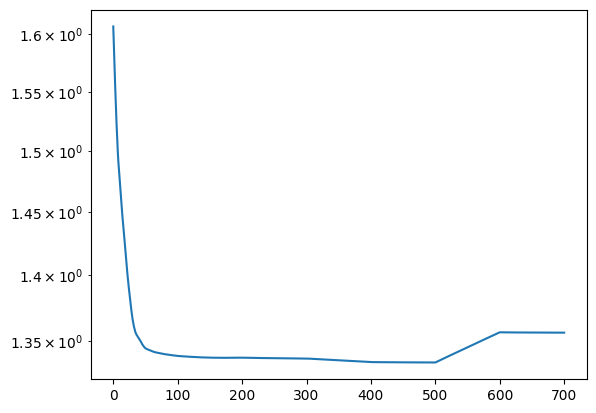

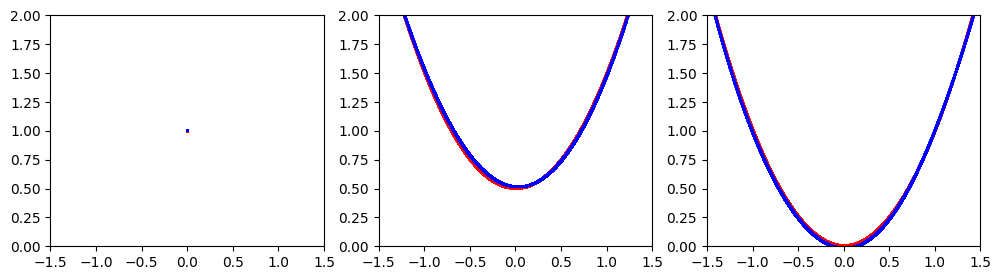

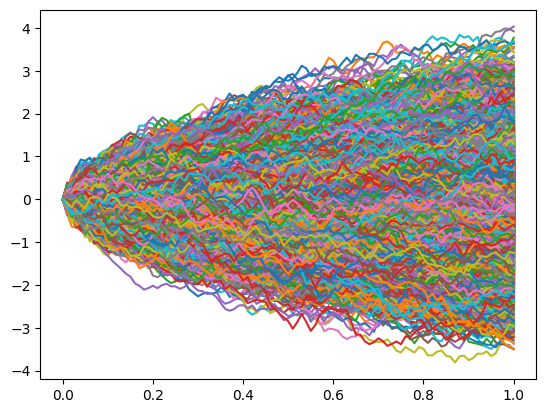

Epoch 5


100%|██████████| 200/200 [00:25<00:00,  7.79it/s]


Epoch 6


100%|██████████| 200/200 [00:26<00:00,  7.56it/s]


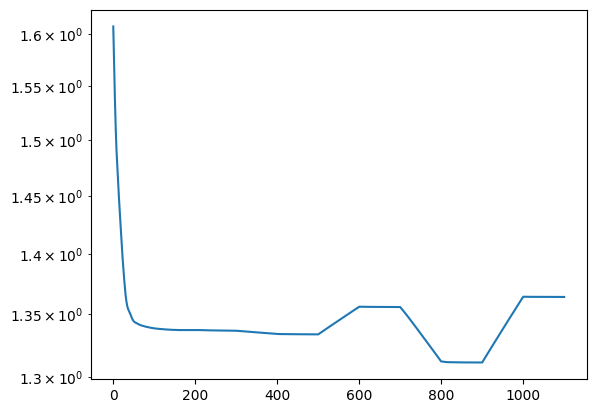

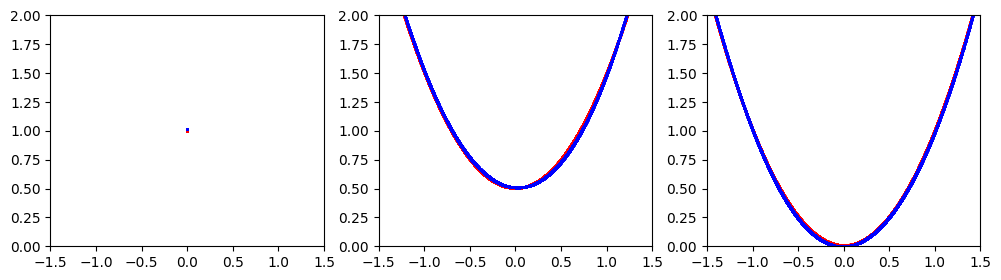

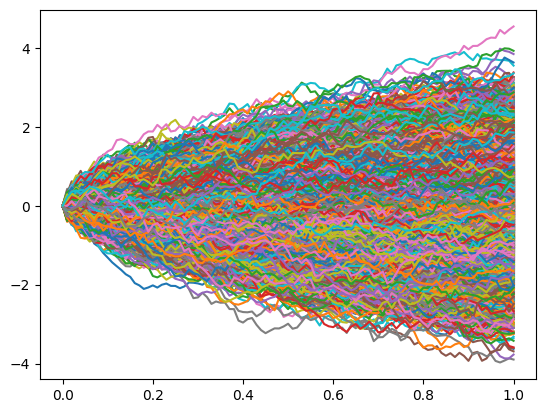

Epoch 7


100%|██████████| 200/200 [00:25<00:00,  7.75it/s]


Epoch 8


100%|██████████| 200/200 [00:26<00:00,  7.57it/s]


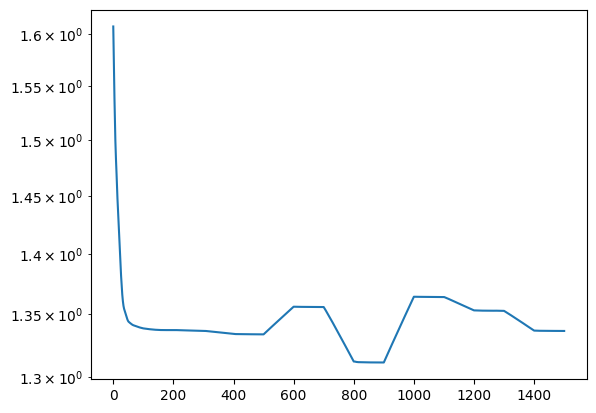

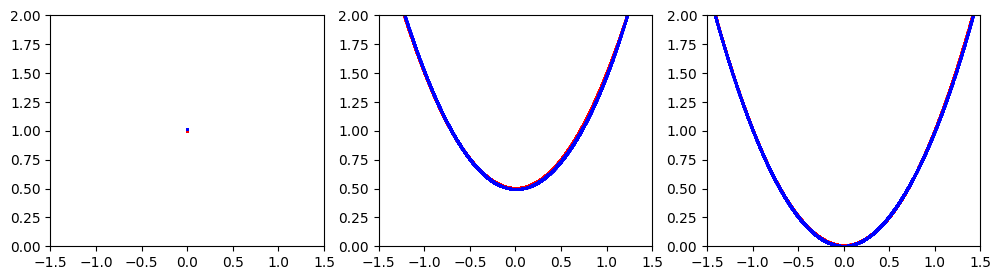

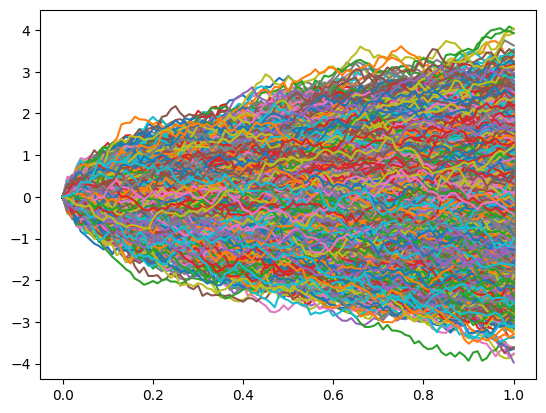

Epoch 9


100%|██████████| 200/200 [00:25<00:00,  7.77it/s]


Epoch 10


100%|██████████| 200/200 [00:26<00:00,  7.56it/s]


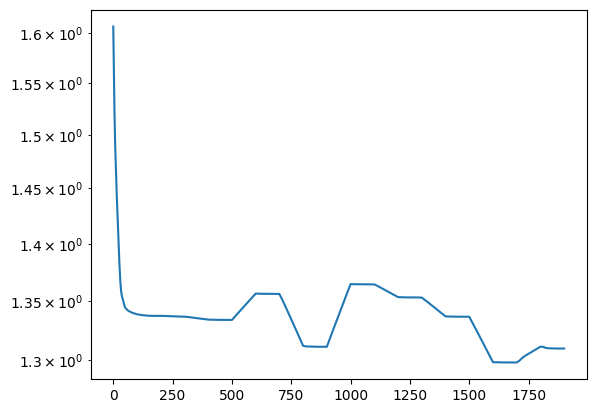

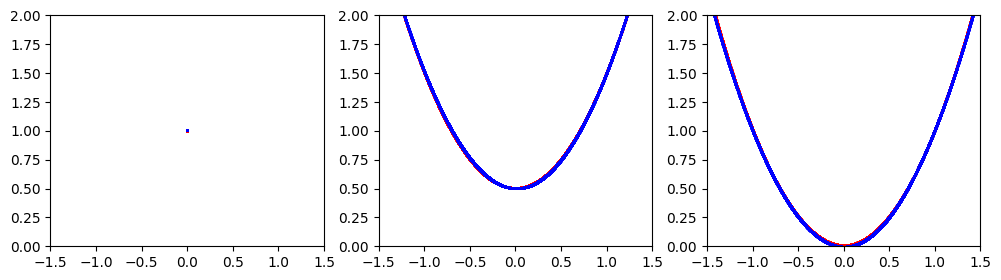

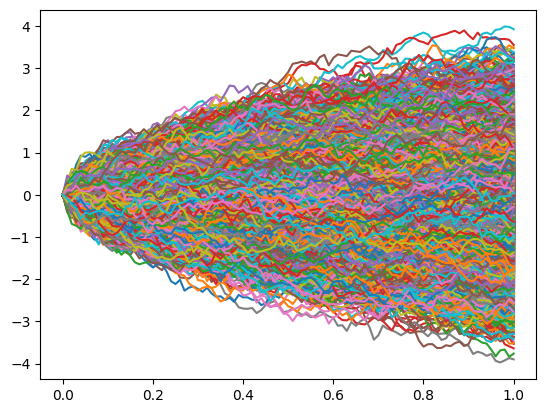

In [12]:
TIME_DOMAIN = torch.linspace(0, 1, 101)
NUMBER_OF_PATHS = 100_000
SPATIAL_DIMENSIONS = 1

TERMINAL_CONDITION = lambda x: x**2

filtration = Filtration(SPATIAL_DIMENSIONS, TIME_DOMAIN, NUMBER_OF_PATHS)
filtration.generate_paths()

bsde = BackwardSDE(
    spatial_dimensions=SPATIAL_DIMENSIONS,
    time_domain=TIME_DOMAIN,
    terminal_condition_function=TERMINAL_CONDITION,
    filtration=filtration,
)

device = "cuda" if torch.cuda.is_available() else "cpu"
bsde.initialize_approximator(nn_args = {'device': device})

bsde.solve(
    approximator_args={
        "batch_size": 20_000,
        "number_of_iterations": 2_000,
        "number_of_epochs": 10,
        "number_of_plots": 5,
        "plotting": True
    }
)